In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#OLS estimation
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [ ]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e
y

array([1.59484106e-01, 2.70962667e+00, 1.89386568e+00, 1.44041774e+00,
       5.60719622e+00, 4.01415960e+00, 3.79042816e+00, 5.49896267e+00,
       7.93934063e+00, 9.31871940e+00, 1.16151797e+01, 1.30800908e+01,
       1.65916731e+01, 1.90612419e+01, 2.22779839e+01, 2.22973772e+01,
       2.90728303e+01, 2.95174936e+01, 3.43906010e+01, 3.68997190e+01,
       4.15314299e+01, 4.65124798e+01, 4.87622029e+01, 5.54649378e+01,
       6.03995721e+01, 6.68905550e+01, 7.10273234e+01, 7.57840504e+01,
       8.32307851e+01, 8.80067872e+01, 9.24604592e+01, 1.00869036e+02,
       1.05000770e+02, 1.13078878e+02, 1.18651097e+02, 1.26357451e+02,
       1.32682080e+02, 1.39131512e+02, 1.47437302e+02, 1.56109386e+02,
       1.64097051e+02, 1.73688174e+02, 1.81821259e+02, 1.88890813e+02,
       1.99352099e+02, 2.10227715e+02, 2.16641136e+02, 2.28077202e+02,
       2.37086627e+02, 2.45435044e+02, 2.56253216e+02, 2.66268455e+02,
       2.77388427e+02, 2.88835852e+02, 2.97996070e+02, 3.11225764e+02,
      

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          2.83e-239
Time:                        07:37:43   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [ ]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


In [ ]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [ ]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     232.2
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           8.80e-28
Time:                        07:38:59   Log-Likelihood:                -34.271
No. Observations:                  50   AIC:                             76.54
Df Residuals:                      46   BIC:                             84.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5233      0.026     19.886      0.0

In [ ]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.52334809  0.37447144 -0.0223435   4.91092107]
Standard errors:  [0.02631805 0.10345934 0.00231074 0.17064722]
Predicted values:  [ 4.35233362  4.80205743  5.21991591  5.5855007   5.8857687   6.11718504
  6.28630383  6.40869134  6.5063685   6.60419295  6.72577498  6.88959841
  7.1059838   7.37539275  7.68835211  8.02701036  8.36807059  8.6866181
  8.96021381  9.17258095  9.31627929  9.39392752  9.41777306  9.40767978
  9.38786447  9.38291808  9.41376548  9.49422757  9.62875055  9.81167543
 10.02816778 10.25665496 10.47237048 10.65142305 10.77472185 10.83111309
 10.81921257 10.74763307 10.63356931 10.49997292 10.37178152 10.27182158
 10.21705804 10.21580708 10.26636975 10.35731113 10.46933904 10.57847369
 10.6599875  10.69246777]


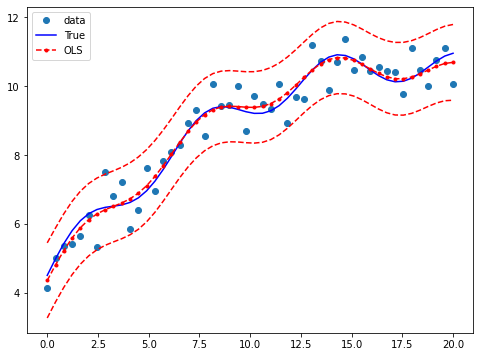

In [ ]:
#Draw a plot to compare the true relationship to OLS predictions. Confidence intervals around the 
#predictions are built using the wls_prediction_std command.
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

In [ ]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e
print(X[:5,:])
print(y[:5])
print(groups)
print(dummy[:5,:])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[ 9.36492787 10.5737534   9.33342616  9.73817365  9.75663622]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     586.7
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           1.18e-36
Time:                        07:42:06   Log-Likelihood:                -68.316
No. Observations:                  50   AIC:                             144.6
Df Residuals:                      46   BIC:                             152.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0509      0.064     16.299      0.0

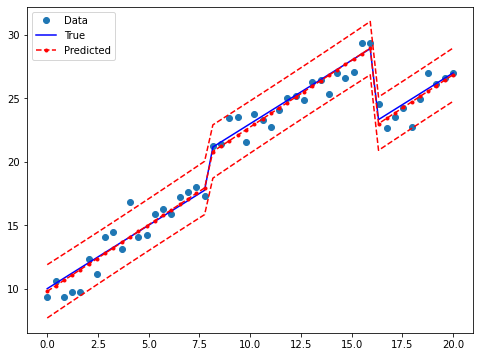

In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

In [ ]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[124.98895964]]), p=2.5378499161315817e-19, df_denom=46, df_num=2>


In [ ]:
print(res2.f_test("x2 = x3 = 0"))

<F test: F=array([[124.98895964]]), p=2.537849916131655e-19, df_denom=46, df_num=2>


In [ ]:
beta = [1., 0.3, -0.0, 10]
y_true = np.dot(X, beta)
y = y_true + np.random.normal(size=nsample)

res3 = sm.OLS(y, X).fit()

In [ ]:
print(res3.f_test(R))
print(res3.f_test("x2 = x3 = 0"))

<F test: F=array([[0.26285274]]), p=0.7700020528761167, df_denom=46, df_num=2>
<F test: F=array([[0.26285274]]), p=0.7700020528761167, df_denom=46, df_num=2>


In [ ]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

In [ ]:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           4.98e-10
Time:                        07:44:57   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [ ]:
norm_x = X.values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)

In [ ]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.87037739987


In [ ]:
ols_results2 = sm.OLS(y.iloc[:14], X.iloc[:14]).fit()
print("Percentage change %4.2f%%\n"*7 % tuple([i for i in (ols_results2.params - ols_results.params)/ols_results.params*100]))

Percentage change 4.55%
Percentage change -2228.01%
Percentage change 154304695.31%
Percentage change 1366329.02%
Percentage change 1112549.36%
Percentage change 92708715.91%
Percentage change 817944.26%



In [ ]:
infl = ols_results.get_influence()

In [ ]:
2./len(X)**.5
print(infl.summary_frame().filter(regex="dfb"))

    dfb_const  dfb_GNPDEFL  ...        dfb_POP      dfb_YEAR
0   -0.016406  -169.822675  ...  207954.113589 -31969.158503
1   -0.020608  -187.251727  ...   25343.938290 -29760.155888
2   -0.008382   -65.417834  ...  107465.770565 -29593.195253
3    0.018093   288.503914  ...  456190.215133 -36213.129569
4    1.871260  -171.109595  ... -389122.401699 -49905.782854
5   -0.321373  -104.123822  ...  144354.586054 -28985.057609
6    0.315945  -169.413317  ... -107413.074918 -32984.462465
7    0.015816   -69.343793  ...   92843.959345 -29724.975873
8   -0.004019   -86.903523  ...   83931.635336 -29563.619222
9   -1.018242  -201.315802  ...   18392.575057 -29203.217108
10   0.030947   -78.359439  ...   93617.648517 -29846.022426
11   0.005987  -100.926843  ...   95414.217290 -29690.904188
12  -0.135883   -32.093127  ...  258559.048569 -29296.334617
13   0.032736   -78.513866  ...  104434.061226 -30025.564763
14   0.305868   -16.833121  ...  275103.677859 -36060.612522
15  -0.538323   102.0271

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:729: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:758: RuntimeWarning: invalid value encountered in 